This is an end-to-end ML project in which real-world New York City Building Energy Data is used. Th goal here is to develop a model that can predict a building's Energy Star Score. Here all stages of Machine Learning Workflow will be covered, namely:
* Data cleaning and formatting
* Exploratory data analysis
* Feature engineering and selection
* Compare several machine learning models on a performance metric
* Perform hyperparameter tuning on the best model
* Evaluate the best model on the testing set
* Interpret the model results

# Data Cleaning and Formatting

First of all standard set of ML libraries are imported (not all, others will be imported when needed). After that, some corrections and cleaning will be done.

## Import Libraries

In [37]:
import pandas as pd
pd.set_option('display.max_columns', 60)
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

Let's have the first look at the data

In [38]:
data=pd.read_csv('../data/Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016.csv')
data.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,10017,675,3 AVENUE,Manhattan,289356.000,Office,Office,Office,293447,Not Available,Not Available,Not Available,Not Available,1963,2,100,Whole Building,Not Available,Not Available,305.6,303.1,37.8,Not Available,614.2,Not Available,Not Available,Not Available,Not Available,Not Available,5.15506751E7,Not Available,Not Available,38139374.2,1.10827705E7,6962.2,0,6962.2,762051,Not Available,Not Available,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.751,-73.974,6.000,4.000,88.000,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,10032,180,FT WASHINGTON AVENUE,Manhattan,3693539.000,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181,Not Available,Not Available,Not Available,Not Available,1969,12,100,Whole Building,Whole Building,55,229.8,228.8,24.8,2.4,401.1,Not Available,1.96248472E7,Not Available,Not Available,Not Available,-3.914148026E8,933073441,9330734.4,332365924,9.62613121E7,55870.4,51016.4,4854.1,3889181,Not Available,Not Available,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841,-73.943,12.000,10.000,251.000,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,10032,3975,BROADWAY,Manhattan,152765.000,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),231342,Not Available,Not Available,Not Available,Not Available,1924,1,100,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,0,0,0,231342,Not Available,Not Available,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840,-73.940,12.000,10.000,251.000,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,10032,161,FT WASHINGTON AVENUE,Manhattan,891040

Let's explore some basic info (datatypes, no. of missing values) about the data. Missing values will be explored and dealt with later.

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11746 non-null  object 
 7   NYC Building Identification Number (BIN)                    11746 non-null  object 
 

## Datatype Corrections

DataTypes for some variables in the given datatset are not correct. They must be converted manually. Also instead of NaN values "Not Available" is used, so they must be replaced.

In [40]:
data = data.replace({'Not Available': np.nan})

for col in list(data.columns):
    if ('ft²' in col or 'kBtu' in col or 'Metric Tons CO2e' in col or 'kWh' in 
        col or 'therms' in col or 'gal' in col or 'Score' in col):
        data[col] = data[col].astype(float)

In [41]:
data.replace({'Not Available': np.nan}, inplace=True)
data.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,NaN,10017,675,3 AVENUE,Manhattan,289356.000,Office,Office,Office,293447.000,NaN,NaN,NaN,NaN,1963,2,100,Whole Building,NaN,NaN,305.600,303.100,37.800,NaN,614.200,NaN,NaN,NaN,NaN,NaN,51550675.100,NaN,NaN,38139374.200,11082770.500,6962.200,0.000,6962.200,762051.000,NaN,NaN,619.400,05/01/2017 05:32:03 PM,No,In Compliance,40.751,-73.974,6.000,4.000,88.000,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,NaN,10032,180,FT WASHINGTON AVENUE,Manhattan,3693539.000,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181.000,NaN,NaN,NaN,NaN,1969,12,100,Whole Building,Whole Building,55.000,229.800,228.800,24.800,2.400,401.100,NaN,19624847.200,NaN,NaN,NaN,-391414802.600,933073441.000,9330734.400,332365924.000,96261312.100,55870.400,51016.400,4854.100,3889181.000,NaN,NaN,404.300,04/27/2017 11:23:27 AM,No,In Compliance,40.841,-73.943,12.000,10.000,251.000,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,NaN,10032,3975,BROADWAY,Manhattan,152765.000,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),231342.000,NaN,NaN,NaN,NaN,1924,1,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,0.000,231342.000,NaN,NaN,NaN,04/27/2017 11:23:27 AM,No,In Compliance,40.840,-73.940,12.000,10.000,251.000,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,10032,161,FT WASHINGTON AVENUE,Manhattan,891040.000,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),1305748.000,NaN,NaN,NaN,NaN,1971,1,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,0.000,1305748.000,NaN,NaN,NaN,04/27/2017 11:23:27 AM,No,In Compliance,40.841,-73.943,12.000,10.000,255.000,Washington Heights South ...
4,5,4778288,Neuro Institute,28400,NYP Columbia (West Campus),1021390085,1-

And now some descriptive statistics on the dataset is shown. 

In [42]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
data.describe()

,Order,Property Id,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Latitude,Longitude,Community Board,Council District,Census Tract
count,11746.000,11746.000,11628.000,11744.000,3741.000,1484.000,11746.000,11746.000,11746.000,9642.000,11583.000,10281.000,10959.000,9783.000,10281.000,9.000,2581.000,1321.000,594.000,16.000,936.000,10304.000,9784.000,11502.000,10960.000,11672.000,11663.000,11681.000,11746.000,7762.000,7762.000,11583.000,9483.000,9483.000,9483.000,9483.000,9483.000
mean,7185.760,3642958.096,173269.454,160552.399,22778.682,12016.825,1948.738,1.290,98.763,59.855,280.071,309.747,11.073,1.901,417.916,3395398.211,3186882.380,5294367.201,2429105.440,1193594.469,286890690.104,50485452.734,536457.759,5965471.810,1768751.955,4553.657,2477.937,2076.339,167373.902,15917.984,136.172,385.908,40.754,-73.957,7.141,15.771,4977.597
std,4323.860,1049069.665,336705.455,309574.598,55094.441,27959.755,30.576,4.017,7.502,29.994,8607.179,9784.731,127.734,97.205,10530.524,2213236.907,5497154.231,5881863.240,4442945.539,3558177.978,3124603263.734,3914719037.611,40226060.905,31544295.404,9389154.023,204163.880,195449.807,59312.947,318923.760,152952.433,1730.727,9312.736,0.080,0.046,3.954,15.674,13520.423
min,1.000,7365.000,50028.000,54.000,0.000,0.000,1600.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,208597.300,0.000,0.000,0.000,0.000,-469079690.900,0.000,0.000,0.000,0.000,0.000,0.000,-23134.300,0.000,0.000,0.000,0.000,40.516,-74.244,1.000,1.000,1.000
25%,3428.250,2747221.500,65240.000,65201.000,4000.000,1720.750,1927.000,1.000,100.000,37.000,61.800,65.100,3.800,0.100,103.500,1663593.700,255037.800,2128212.800,0.000,56980.200,4320253.625,1098250.800,11769.525,1043672.650,301997.450,328.700,147.450,94.800,66994.000,2595.400,27.150,99.400,40.707,-73.985,4.000,4.000,100.000
50%,6986.500,3236403.500,93138.500,91324.000,8654.000,5000.000,1941.000,1.000,100.000,65.000,78.500,82.500,5.300,0.500,129.400,4328815.300,1380138.000,4312984.300,0.000,207002.050,9931240.200,4103962.150,44455.250,1855196.050,541631.250,500.250,272.600,171.800,94080.000,4692.500,45.095,124.900,40.759,-73.963,7.000,9.000,201.000
75%,11054.500,4409091.750,159614.000,153255.000,20000.000,12000.000,1966.000,1.000,100.000,85.000,97.600,102.500,9.200,0.700,167.200,4938946.700,4445807.600,6514519.800,4293825.325,291833.175,20644966.925,6855070.000,73481.075,4370301.500,1284676.550,908.425,447.500,424.900,158414.000,8031.875,70.805,162.750,40.818,-73.932,9.000,33.000,531.500
max,14993.000,5991312.000,13540113.000,14217119.000,962428.000,591640.000,2019.000,161.000,100.000,100.000,869265.000,939329.000,6259.400,9393.000,986366.000,6275849.600,104684866.100,79074639.000,44103779.700,14351779.200,71635184100.000,394285242148.000,3942852421.500,1691763071.000,495827334.500,20943400.000,20943400.000,4764375.000,14217119.000,6594603.900,96305.690,912801.100,40.913,-73.716,56.000,51.000,155101.000


## Missing Values Handling

Now let's write a little function that show how many missing values (both in absolute valeus and in percentages) there are in features of a given dataset. Missing values will not be a problem in EDA, but in ML modelling part they'll probably cause problems, as ML algorithms won't accept data with NaNs.  

In [43]:
def missing_values_df(df, n, bottom=False):
    missing_cols=df.isnull().sum()
    missing_cols_percent=(missing_cols/len(df)*100).round(2)
    missing_df=pd.DataFrame({'No. of Missing Values':missing_cols, 
                            '% of Missing Values':missing_cols_percent})
    print(f'{sum(np.where(missing_cols>0, 1, 0))} out of {len(missing_cols)} columns have NaNs')
    if bottom:
        final=missing_df.sort_values(by=missing_df.columns[0], ascending=False).replace({0:np.nan}).dropna()[-n:]
    else:
        final=missing_df.sort_values(by=missing_df.columns[0], ascending=False)[:n]
    return final

missing_values_df(data, 10)

46 out of 60 columns have NaNs


,No. of Missing Values,% of Missing Values
Fuel Oil #1 Use (kBtu),11737,99.920
Diesel #2 Use (kBtu),11730,99.860
Address 2,11539,98.240
Fuel Oil #5 & 6 Use (kBtu),11152,94.940
District Steam Use (kBtu),10810,92.030
Fuel Oil #4 Use (kBtu),10425,88.750
3rd Largest Property Use Type - Gross Floor Area (ft²),10262,87.370
3rd Largest Property Use Type,10262,87.370
Fuel Oil #2 Use (kBtu),9165,78.030
2nd Largest Property Use - Gross Floor Area (ft²),8005,68.150


Lots of columns with majority of values being NaNs. They must be handled before ML modelling part. Now least empty features will be explored.

In [44]:
missing_values_df(data, 10, bottom=True)

46 out of 60 columns have NaNs


,No. of Missing Values,% of Missing Values
DOF Gross Floor Area,118.000,1.000
Direct GHG Emissions (Metric Tons CO2e),83.000,0.710
Total GHG Emissions (Metric Tons CO2e),74.000,0.630
Indirect GHG Emissions (Metric Tons CO2e),65.000,0.550
Metered Areas (Energy),57.000,0.490
DOF Benchmarking Submission Status,30.000,0.260
"NYC Borough, Block and Lot (BBL) self-reported",11.000,0.090
BBL - 10 digits,11.000,0.090
Largest Property Use Type,2.000,0.020
Largest Property Use Type - Gross Floor Area (ft²),2.000,0.020


Features with 50%+ of missing values are removed. The thershold is arbitrary, you can use other values depending on your task and data.

In [45]:
all_missing=missing_values_df(data, data.shape[1])
cols_to_delete=list(all_missing[all_missing.iloc[:,1]>50].index)
print(f'{len(cols_to_delete)} columns to delete')
cols_to_delete

46 out of 60 columns have NaNs
11 columns to delete


['Fuel Oil #1 Use (kBtu)',
 'Diesel #2 Use (kBtu)',
 'Address 2',
 'Fuel Oil #5 & 6 Use (kBtu)',
 'District Steam Use (kBtu)',
 'Fuel Oil #4 Use (kBtu)',
 '3rd Largest Property Use Type - Gross Floor Area (ft²)',
 '3rd Largest Property Use Type',
 'Fuel Oil #2 Use (kBtu)',
 '2nd Largest Property Use - Gross Floor Area (ft²)',
 '2nd Largest Property Use Type']

In [46]:
data.drop(columns=cols_to_delete, inplace=True)
print(f'Now we have {data.shape[1]} columns')

Now we have 49 columns


# Exploratory Data Analysis

The second stage is Exploratory Data Analysis (EDA). During EDA we explore and analyze dataset using various data visualizations. For plotting data `matplotlib` and `seaborn` will be used. Let's plot a histogram of our label (column that must be predicted)-Energy Star Score.

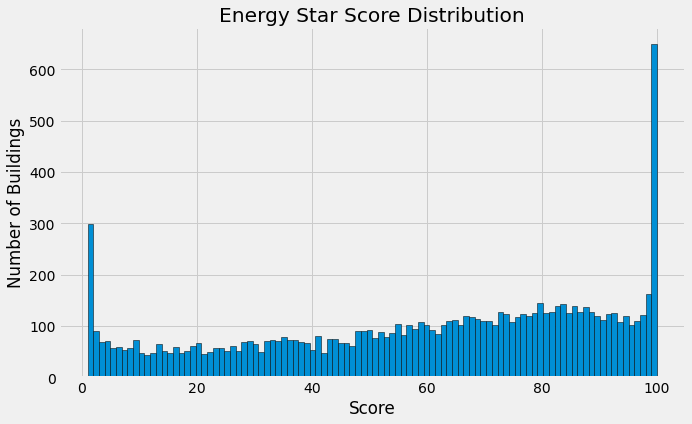

In [47]:
plt.figure(figsize=(10, 6))

plt.hist(data['ENERGY STAR Score'].dropna(), bins=100, edgecolor='k')
plt.xlabel('Score')
plt.ylabel('Number of Buildings')
plt.title('Energy Star Score Distribution');

Surprisingly, there are two peaks and maximum and minimum values: 0 and 100. The problem might be in data collection. Turns out, this score is based on sefl-reported energy usage. Hence, some building owners might just lower the actual power usage to artificially boost the score of their building. Now we plot another column: Energy Use Intensity (EUI), which is the total energy use divided by the square footage of the building. 

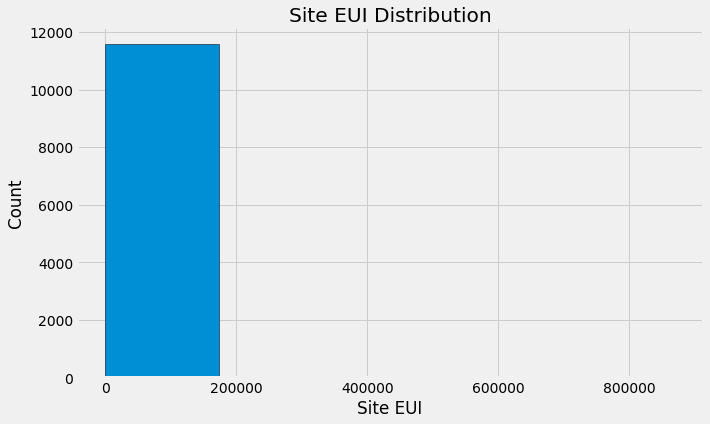

In [48]:
plt.figure(figsize=(10, 6))
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins=5, edgecolor = 'black')
plt.xlabel('Site EUI')
plt.ylabel('Count')
plt.title('Site EUI Distribution');

Very skewed histogram. The skew is caused by outliers. We must investigave further.

In [49]:
data['Site EUI (kBtu/ft²)'].describe()

count    11583.000
mean       280.071
std       8607.179
min          0.000
25%         61.800
50%         78.500
75%         97.600
max     869265.000
Name: Site EUI (kBtu/ft²), dtype: float64

Max value is clearly an outlier. This and other outliers must be removed in order to make it easier for ML models to learn (and make plots pretier).

In [50]:
data[data['Site EUI (kBtu/ft²)']==869265.]

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
8068,9984,4414323,234 Skillman,Not Applicable: Standalone Property,Not Applicable: Standalone Property,3028937502,3028937502,"3390250 , 3338313",234 Skillman avenue,11211,234,SKILLMAN AVENUE,Brooklyn,61811.000,Multifamily Housing,Multifamily Housing,Multifamily Housing,56900.000,2004,1,90,Whole Building,NaN,1.000,869265.000,939329.000,9.900,9393.000,986366.000,49459193300.000,534458968.800,1983655.600,563239.600,2627199.100,2627015.000,184.100,56900.000,2547.900,44.780,912801.100,05/01/2017 11:34:14 PM,NaN,In Compliance,40.716,-73.941,1.000,34.000,477.000,East Williamsburg ...


## Removing Outliers

Everything lower than `Q1-1*IQR` and `Q3+3*IQR` are considered to be outliers. `Q1` and `Q3` and first and trird quartiles (25% and 75% of data respectively is located smaller than tehse values). `IQR` is Interquartile Range, which is simply `Q3-Q1`.

In [51]:
q1, q3=data['Site EUI (kBtu/ft²)'].describe()[['25%', '75%']]
iqr=q3-q1

rows_before=data.shape[0]
data=data[(data['Site EUI (kBtu/ft²)']>(q1-3*iqr)) & (data['Site EUI (kBtu/ft²)']<(q3+3*iqr))]
diff=rows_before-data.shape[0]
print(f'There are {diff} outliers ({100*diff/data.shape[0]:.3f}%) our of {rows_before} rows')

There are 427 outliers (3.772%) our of 11746 rows


In [52]:
data.shape

(11319, 49)

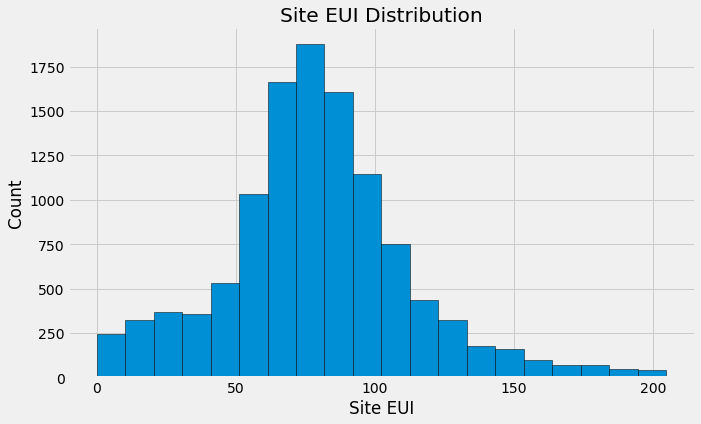

In [53]:
plt.figure(figsize=(10, 6))
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins=20, edgecolor = 'black')
plt.xlabel('Site EUI')
plt.ylabel('Count')
plt.title('Site EUI Distribution');

Much better results now.

## Relationships between Features

Now let's explore how the label is correlated with other features. Firstly, Density plot (basically a smoothed histogram) is used.

In [54]:
types=data.dropna(subset=['ENERGY STAR Score'])
types=types['Largest Property Use Type'].value_counts()
types=list(types[types.values>100].index) # use only types with 100+ observations in dataset
types

['Multifamily Housing', 'Office', 'Hotel', 'Non-Refrigerated Warehouse']

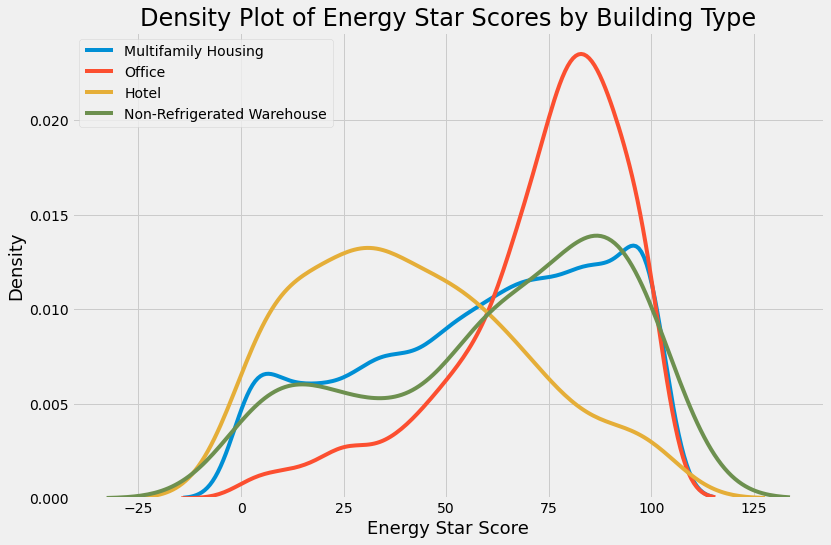

In [55]:
plt.figure(figsize=(12,8))

for t in types:
    subset=data[data['Largest Property Use Type']==t]
    sns.kdeplot(subset['ENERGY STAR Score'].dropna(), label=t)

plt.xlabel('Energy Star Score', size=18)
plt.ylabel('Density', size=18)
plt.legend()
plt.title('Density Plot of Energy Star Scores by Building Type', size=24);

From here we can see that building type does have some effect on the score. This feature might help to predict the score later.

In [56]:
types=data.dropna(subset=['ENERGY STAR Score'])
types=types['Largest Property Use Type'].value_counts()
types=list(types[types.values>100].index)
types

['Multifamily Housing', 'Office', 'Hotel', 'Non-Refrigerated Warehouse']

In [57]:
boroughs=data.dropna(subset=['ENERGY STAR Score'])
boroughs=boroughs['Borough'].value_counts()
boroughs=list(boroughs[boroughs.values>100].index)
boroughs

['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island']

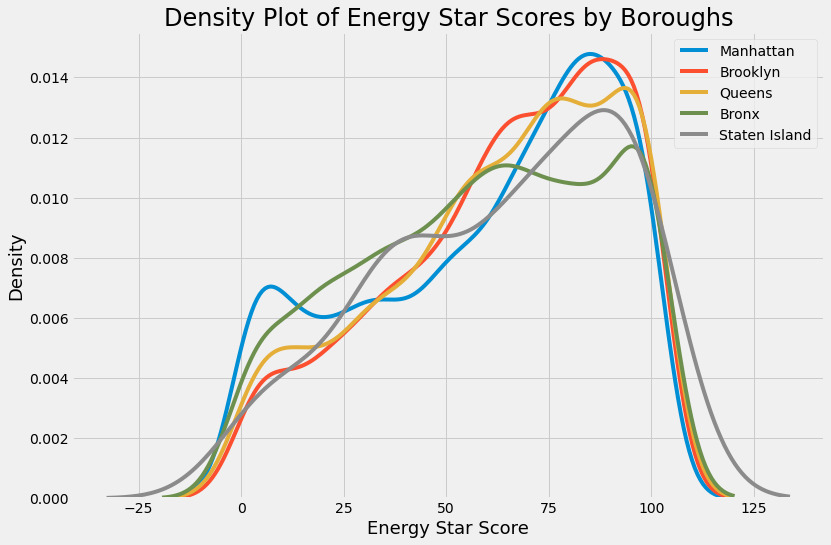

In [58]:
plt.figure(figsize=(12,8))

for b in boroughs:
    sns.kdeplot(data[data['Borough']==b]['ENERGY STAR Score'].dropna(), label=b)

plt.xlabel('Energy Star Score', size=18)
plt.ylabel('Density', size=18)
plt.legend()
plt.title('Density Plot of Energy Star Scores by Boroughs', size=24);

The borough of the building does not seem to help as much as a building type.

## Feature-Target Correlations

Now we can look at correlations between features and target using Pearson correlation. This indicatior varies from -1 (negative correlation) to 1 (positive correlation). Although it can't capture non-linear relationships between features, Pearson correlation still can be very useful.

In [59]:
data.corr()['ENERGY STAR Score'].sort_values()

Site EUI (kBtu/ft²)                                          -0.724
Weather Normalized Site EUI (kBtu/ft²)                       -0.714
Weather Normalized Source EUI (kBtu/ft²)                     -0.646
Source EUI (kBtu/ft²)                                        -0.641
Weather Normalized Site Electricity Intensity (kWh/ft²)      -0.358
Weather Normalized Site Natural Gas Intensity (therms/ft²)   -0.346
Direct GHG Emissions (Metric Tons CO2e)                      -0.148
Weather Normalized Site Natural Gas Use (therms)             -0.135
Natural Gas Use (kBtu)                                       -0.134
Year Built                                                   -0.121
Total GHG Emissions (Metric Tons CO2e)                       -0.113
Electricity Use - Grid Purchase (kBtu)                       -0.051
Weather Normalized Site Electricity (kWh)                    -0.048
Latitude                                                     -0.048
Property Id                                     

Some strong negative correlations (`Site EUI (kBtu/ft²)`, `Weather Normalized Site EUI (kBtu/ft²)`) that will be further explored. As for positive correlations, they are very weak and probably not worth looking into.

To account for possible non-linear relationships, we can take square root and natural log transformations of the features and then calculate the correlation coefficients with the score. Also building type and borough, being categorical features, must be one-hot-encoded. These transformations will make the dataset 'wider' (add more columns). 

In [60]:
import warnings
warnings.filterwarnings('ignore')

def log_sqrt_transform(df):
    num_feats=df.select_dtypes('number')
    cat_feats=df[['Borough', 'Largest Property Use Type']]

    for col in num_feats.columns:
        if col!='ENERGY STAR Score':
            num_feats['sqrt_'+col]=np.sqrt(num_feats[col])
            num_feats['log_'+col]=np.log(num_feats[col])

    cat_feats=pd.get_dummies(cat_feats)
    return pd.concat([num_feats, cat_feats], axis=1)
    
feats=log_sqrt_transform(data)
feats_corrs=feats.corr()['ENERGY STAR Score'].sort_values()

In [61]:
feats.shape

(11319, 138)

In [62]:
feats_corrs.head(10)

Site EUI (kBtu/ft²)                             -0.724
Weather Normalized Site EUI (kBtu/ft²)          -0.714
sqrt_Site EUI (kBtu/ft²)                        -0.700
sqrt_Weather Normalized Site EUI (kBtu/ft²)     -0.689
sqrt_Weather Normalized Source EUI (kBtu/ft²)   -0.671
sqrt_Source EUI (kBtu/ft²)                      -0.669
Weather Normalized Source EUI (kBtu/ft²)        -0.646
Source EUI (kBtu/ft²)                           -0.641
log_Source EUI (kBtu/ft²)                       -0.623
log_Weather Normalized Source EUI (kBtu/ft²)    -0.620
Name: ENERGY STAR Score, dtype: float64

In [63]:
feats_corrs.dropna().tail(10)

Largest Property Use Type_Hospital (General Medical & Surgical)   0.048
Borough_Brooklyn                                                  0.050
log_Community Board                                               0.055
Community Board                                                   0.057
sqrt_Community Board                                              0.058
sqrt_Council District                                             0.061
log_Council District                                              0.061
Council District                                                  0.062
Largest Property Use Type_Office                                  0.158
ENERGY STAR Score                                                 1.000
Name: ENERGY STAR Score, dtype: float64

Although newly-created features have some correlation with our target, there are not as strong as `Site EUI (kBtu/ft^2)`. Let's visualize the relationship between target and `Site EUI (kBtu/ft^2)` usinf scatterplot.

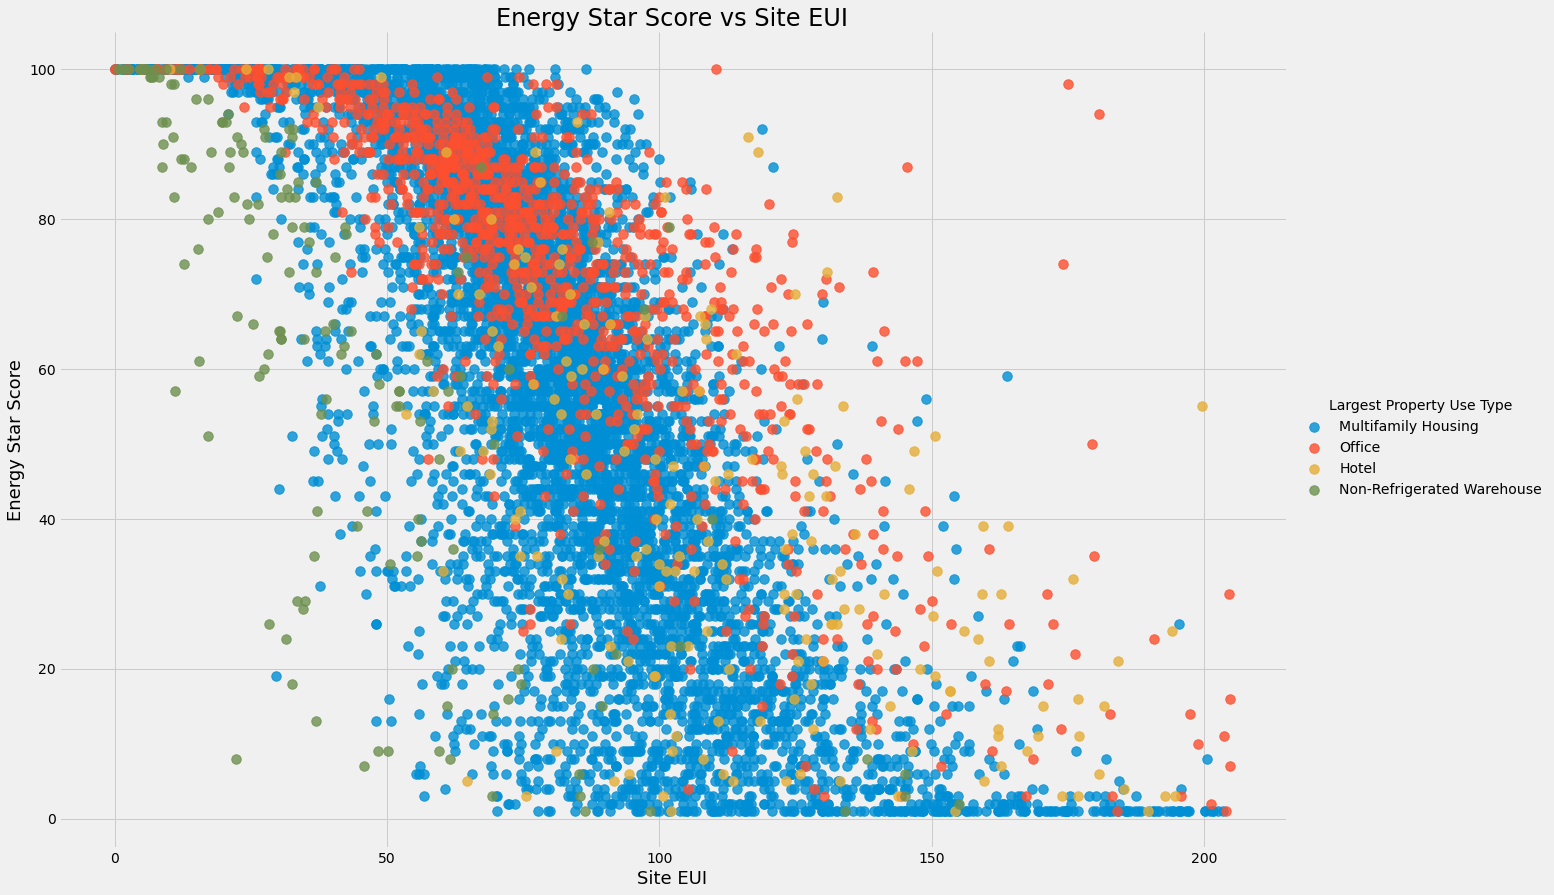

In [64]:
from IPython.core.pylabtools import figsize
figsize(12, 10)

feats['Largest Property Use Type']=data.dropna(subset=['ENERGY STAR Score'])['Largest Property Use Type']
feats=feats[feats['Largest Property Use Type'].isin(types)]

sns.lmplot('Site EUI (kBtu/ft²)', 
            'ENERGY STAR Score', 
            hue='Largest Property Use Type',
            data=feats,
            scatter_kws={'s':90},
            fit_reg=False,
            size=12, 
            aspect=1.5)
            
plt.xlabel("Site EUI", size=18)
plt.ylabel('Energy Star Score', size=18)
plt.title('Energy Star Score vs Site EUI', size=24);


There is a clear negative relationship between the Site EUI and the score. The relationship is not perfectly linear but it does look like this feature will be important for predicting the score in ML part of the project.

It's also possible to make pair plots between several different variables. The Pairs Plot is a great way to examine many variables at once as it shows scatterplots between pairs of variables and histograms of single variables on the diagonal.

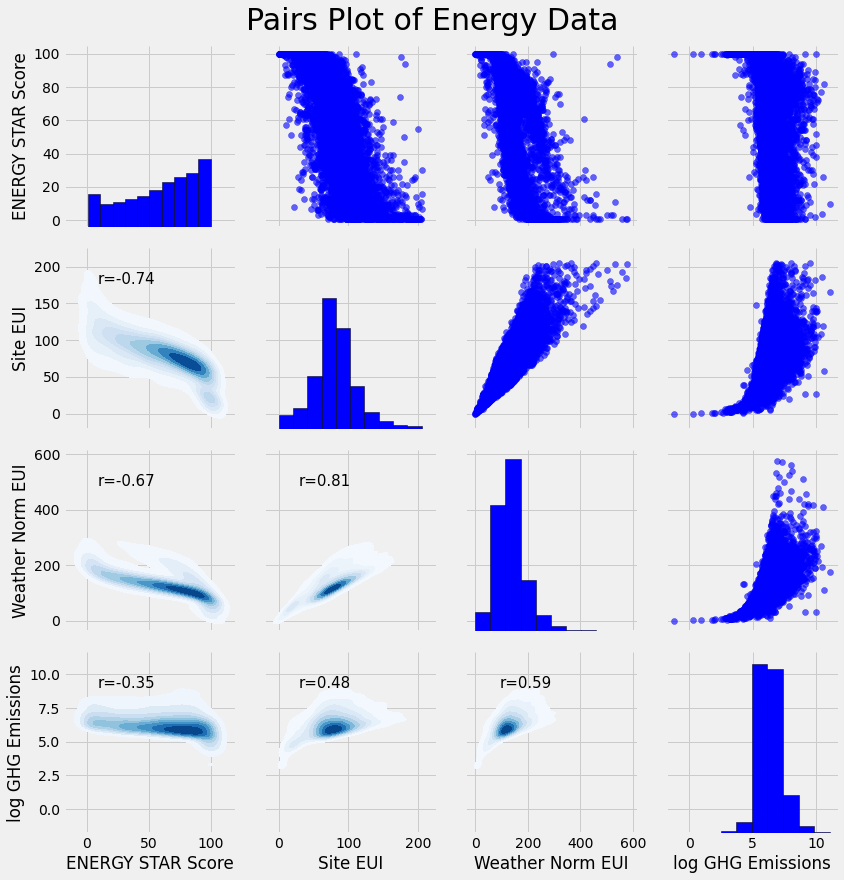

In [65]:
plot_data=feats[['ENERGY STAR Score', 'Site EUI (kBtu/ft²)', 
                        'Weather Normalized Source EUI (kBtu/ft²)', 
                        'log_Total GHG Emissions (Metric Tons CO2e)']]

plot_data.replace({np.inf: np.nan, -np.inf: np.nan}, inplace=True)

plot_data.rename(columns={'Site EUI (kBtu/ft²)': 'Site EUI', 
                        'Weather Normalized Source EUI (kBtu/ft²)': 'Weather Norm EUI',
                        'log_Total GHG Emissions (Metric Tons CO2e)': 'log GHG Emissions'}, inplace=True)

plot_data.dropna(inplace=True)

def get_coor(X, y, **kwargs):
    r=np.corrcoef(X, y)[0][1]
    ax=plt.gca()
    ax.annotate(f"r={r:.2f}", xy=(.2 ,.8), xycoords=ax.transAxes, size=15)

grid=sns.PairGrid(data=plot_data, size=3)
grid.map_upper(plt.scatter, color='blue', alpha=0.6)
grid.map_diag(plt.hist, color='blue', edgecolor='k')
grid.map_lower(get_coor)
grid.map_lower(sns.kdeplot, cmap=plt.cm.Blues, fill=True)

plt.suptitle('Pairs Plot of Energy Data', size=30, y=1.02);

# Feature Engineering and Selection


Although FE can be dull, and often is omitted in lots of tutorials, it's an extremely important part of any DS/ML project. Good FE brings often beats super complex model architectures, bringing huge accuracy boosts. FE is mostly done manually and may require some domain knowledge, Here a simple tactics of adding los and sqrt of existing features is used. Also categorical features are one-hot-encoded.

## Add Log and Sqrt Transforms

In [66]:
feats=log_sqrt_transform(data)
feats.shape

(11319, 138)

## Remove Collinearity

Highly collinear features have a significant correlation coefficent between them. It's a problem for ML models because it may lead to:
inaccurate parameter estimates and exclusion of significant predictors for the model. By removing collinear features we reduce model complexity. It can help to increase model generalization an model interpetablity. 

In [67]:
feats.corr()

,Order,Property Id,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Latitude,Longitude,Community Board,Council District,Census Tract,sqrt_Order,...,Largest Property Use Type_Museum,Largest Property Use Type_Non-Refrigerated Warehouse,Largest Property Use Type_Office,Largest Property Use Type_Other,Largest Property Use Type_Other - Education,Largest Property Use Type_Other - Entertainment/Public Assembly,Largest Property Use Type_Other - Lodging/Residential,Largest Property Use Type_Other - Mall,Largest Property Use Type_Other - Public Services,Largest Property Use Type_Other - Recreation,Largest Property Use Type_Other - Services,Largest Property Use Type_Other - Specialty Hospital,Largest Property Use Type_Outpatient Rehabilitation/Physical Therapy,Largest Property Use Type_Parking,Largest Property Use Type_Performing Arts,Largest Property Use Type_Pre-school/Daycare,Largest Property Use Type_Refrigerated Warehouse,"Largest Property Use Type_Repair Services (Vehicle, Shoe, Locksmith, etc.)",Largest Property Use Type_Residence Hall/Dormitory,Largest Property Use Type_Residential Care Facility,Largest Property Use Type_Restaurant,Largest Property Use Type_Retail Store,Largest Property Use Type_Self-Storage Facility,Largest Property Use Type_Senior Care Community,Largest Property Use Type_Social/Meeting Hall,Largest Property Use Type_Strip Mall,Largest Property Use Type_Supermarket/Grocery Store,Largest Property Use Type_Urgent Care/Clinic/Other Outpatient,Largest Property Use Type_Wholesale Club/Supercenter,Largest Property Use Type_Worship Facility
Order,1.000,0.061,-0.143,-0.140,0.157,0.065,0.048,0.037,-0.002,0.011,-0.308,0.332,-0.185,0.006,0.007,-0.218,-0.219,-0.175,-0.011,-0.214,-0.149,-0.011,0.005,-0.191,-0.340,0.251,0.485,0.865,0.238,0.981,...,0.005,0.097,-0.291,0.035,-0.008,0.004,0.006,0.028,0.010,-0.008,0.009,-0.013,0.002,0.002,-0.028,-0.002,0.030,0.027,-0.070,0.003,-0.014,0.037,0.038,0.081,-0.016,0.012,0.046,0.004,0.020,0.018
Property Id,0.061,1.000,-0.086,-0.065,0.066,0.002,-0.121,-0.047,-0.049,-0.036,-0.043,0.019,-0.053,0.002,0.003,-0.120,-0.121,-0.105,-0.004,-0.129,-0.075,-0.005,0.006,-0.062,0.027,0.075,-0.024,0.058,0.007,0.052,...,0.002,-0.004,-0.093,0.003,-0.009,-0.011,0.001,0.001,0.020,0.006,-0.011,-0.009,0.017,0.020,0.036,0.009,-0.003,0.009,-0.048,0.022,-0.007,-0.023,0.018,-0.010,0.012,0.022,-0.005,0.004,0.011,0.017
DOF Gross Floor Area,-0.143,-0.086,1.000,0.854,0.110,0.061,-0.025,0.013,0.028,0.014,0.182,-0.056,0.118,0.541,0.529,0.630,0.659,0.747,0.503,0.605,0.863,0.061,-0.008,0.117,-0.010,-0.075,-0.111,-0.120,-0.011,-0.159,...,-0.003,-0.015,0.159,-0.009,-0.002,0.031,-0.003,0.027,-0.004,-0.003,-0.004,0.007,-0.005,0.015,-0.003,-0.001,-0.006,-0.004,-0.001,-0.004,-0.001,0.007,-0.012,-0.013,-0.005,0.005,-0.004,-0.005,-0.002,-0.008
Largest Property Use Type - Gross Floor Area (ft²),-0.140,-0.065,0.854,1.000,0.098,0.102,-0.033,0.018,0.020,0.006,0.147,-0.049,0.092,0.614,0.613,0.665,0.663,0.790,0.562,0.642,0.993,0.055,-0.009,0.100,-0.021,-0.084,-0.101,-0.116,-0.016,-0.155,...,-0.003,-0.018,0.161,-0.012,-0.003,0.004,-0.002,0.008,-0.005,-0.000,-0.004,0.009,-0.005,0.009,0.001,-0.005,-0.007,-0.005,-0.009,0.002,-0.002,0.006,-0.014,-0.009,-0.004,0.001,-0.013,-0.005,-0.003,-0.008
Year Built,0.157,0.066,0.110,0.098

Let's create a function that given a dataset looks for highly correlated features and returns their names. Later these features will be removed. 

In [68]:
def remove_collinear_features(x, threshold):
    y = x['ENERGY STAR Score']
    x = x.drop(columns = ['ENERGY STAR Score'])
    
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            if val >= threshold:
                drop_cols.append(col.values[0])

    drops = set(drop_cols)
    x = x.drop(columns = drops)
    x = x.drop(columns = ['Weather Normalized Site EUI (kBtu/ft²)', 
                            'Water Use (All Water Sources) (kgal)',
                            'log_Water Use (All Water Sources) (kgal)',
                            'Largest Property Use Type - Gross Floor Area (ft²)'])

    x['ENERGY STAR Score'] = y
    return x

In [69]:
def find_highly_corr(df, thresh):
    correlated_feats=set()
    df=df.drop(columns=['ENERGY STAR Score'])
    df_corr=df.corr()
    for i in range(len(df_corr.columns)):
        for j in range(i):
            if abs(df_corr.iloc[j, i])>=thresh:
                # print(df_corr.columns[i], abs(df_corr.iloc[j, i]))
                colname=df_corr.columns[i]
                correlated_feats.add(colname)
    return correlated_feats

highly_corr=find_highly_corr(feats, 0.6)

In [70]:
highly_corr

{'Borough_Bronx',
 'Borough_Brooklyn',
 'Borough_Manhattan',
 'Borough_Queens',
 'Council District',
 'Direct GHG Emissions (Metric Tons CO2e)',
 'Electricity Use - Grid Purchase (kBtu)',
 'Indirect GHG Emissions (Metric Tons CO2e)',
 'Largest Property Use Type - Gross Floor Area (ft²)',
 'Largest Property Use Type_Office',
 'Natural Gas Use (kBtu)',
 'Property GFA - Self-Reported (ft²)',
 'Source EUI (kBtu/ft²)',
 'Total GHG Emissions (Metric Tons CO2e)',
 'Water Intensity (All Water Sources) (gal/ft²)',
 'Weather Normalized Site EUI (kBtu/ft²)',
 'Weather Normalized Site Electricity (kWh)',
 'Weather Normalized Site Natural Gas Use (therms)',
 'Weather Normalized Source EUI (kBtu/ft²)',
 'log_Census Tract',
 'log_Community Board',
 'log_Council District',
 'log_DOF Gross Floor Area',
 'log_Direct GHG Emissions (Metric Tons CO2e)',
 'log_Electricity Use - Grid Purchase (kBtu)',
 'log_Indirect GHG Emissions (Metric Tons CO2e)',
 'log_Largest Property Use Type - Gross Floor Area (ft²)',

In [71]:
feats=feats.drop(columns=highly_corr)
feats.shape

(11319, 65)

50% of features got removed, which is huge. It also tells us that the dataset had a lot of redundant fatures.

## Train/Test Split

In machine learning, we always need to separate our features into two sets:

* Training set which we provide to our model during training along with the answers so it can learn a mapping between the features and the target.
* Testing set which we use to evaluate the model skill. The model has never seen the answers on the testing set, but instead, must make predictions using only the features. As we know the true answers for the test set, we can then compare the test predictions to the true test targets to ghet an estimate of how well our model will perform when deployed in the real world.

In [72]:
score, no_score=feats[feats['ENERGY STAR Score'].notna()], feats[feats['ENERGY STAR Score'].isna()]
score.shape, no_score.shape

((9461, 65), (1858, 65))

In [73]:
from sklearn.model_selection import train_test_split

features, targets=score.drop(columns='ENERGY STAR Score'), pd.DataFrame(score['ENERGY STAR Score'])

X, X_test, y, y_test = train_test_split(features, targets, test_size = 0.3)

print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)


(6622, 64)
(2839, 64)
(6622, 1)
(2839, 1)


In [74]:
no_score.to_csv('../data/no_score.csv', index = False)
X.to_csv('../data/training_features.csv', index = False)
X_test.to_csv('../data/testing_features.csv', index = False)
y.to_csv('../data/training_labels.csv', index = False)
y_test.to_csv('../data/testing_labels.csv', index = False)

# ML Models Comparison

Now that we have train and test sets to train the models, it's finally time to do it. 5 algorithms will be tested: 
1. Linear Regression
2. Support Vector Machine Regression
3. Random Forest Regression
4. Gradient Boosting Regression
5. K-Nearest Neighbors Regression

In [75]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from skopt import BayesSearchCV

In [76]:
train_features = pd.read_csv('../data/training_features.csv')
test_features = pd.read_csv('../data/testing_features.csv')
train_labels = pd.read_csv('../data/training_labels.csv')
test_labels = pd.read_csv('../data/testing_labels.csv')

print('Training Feature Size: ', train_features.shape)
print('Testing Feature Size:  ', test_features.shape)
print('Training Labels Size:  ', train_labels.shape)
print('Testing Labels Size:   ', test_labels.shape)

Training Feature Size:  (6622, 64)
Testing Feature Size:   (2839, 64)
Training Labels Size:   (6622, 1)
Testing Labels Size:    (2839, 1)


In [77]:
train_features.head(10)

,Order,Property Id,DOF Gross Floor Area,Year Built,Number of Buildings - Self-reported,Occupancy,Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Water Use (All Water Sources) (kgal),Latitude,Longitude,Community Board,Census Tract,sqrt_Longitude,log_Longitude,Borough_Staten Island,Largest Property Use Type_Adult Education,Largest Property Use Type_Automobile Dealership,Largest Property Use Type_Bank Branch,Largest Property Use Type_College/University,Largest Property Use Type_Convenience Store without Gas Station,Largest Property Use Type_Courthouse,Largest Property Use Type_Distribution Center,Largest Property Use Type_Enclosed Mall,Largest Property Use Type_Financial Office,Largest Property Use Type_Hospital (General Medical & Surgical),Largest Property Use Type_Hotel,Largest Property Use Type_K-12 School,Largest Property Use Type_Library,...,Largest Property Use Type_Multifamily Housing,Largest Property Use Type_Museum,Largest Property Use Type_Non-Refrigerated Warehouse,Largest Property Use Type_Other,Largest Property Use Type_Other - Education,Largest Property Use Type_Other - Entertainment/Public Assembly,Largest Property Use Type_Other - Lodging/Residential,Largest Property Use Type_Other - Mall,Largest Property Use Type_Other - Public Services,Largest Property Use Type_Other - Recreation,Largest Property Use Type_Other - Services,Largest Property Use Type_Other - Specialty Hospital,Largest Property Use Type_Outpatient Rehabilitation/Physical Therapy,Largest Property Use Type_Parking,Largest Property Use Type_Performing Arts,Largest Property Use Type_Pre-school/Daycare,Largest Property Use Type_Refrigerated Warehouse,"Largest Property Use Type_Repair Services (Vehicle, Shoe, Locksmith, etc.)",Largest Property Use Type_Residence Hall/Dormitory,Largest Property Use Type_Residential Care Facility,Largest Property Use Type_Restaurant,Largest Property Use Type_Retail Store,Largest Property Use Type_Self-Storage Facility,Largest Property Use Type_Senior Care Community,Largest Property Use Type_Social/Meeting Hall,Largest Property Use Type_Strip Mall,Largest Property Use Type_Supermarket/Grocery Store,Largest Property Use Type_Urgent Care/Clinic/Other Outpatient,Largest Property Use Type_Wholesale Club/Supercenter,Largest Property Use Type_Worship Facility
0,2882,2715785,65750.000,1924,1,100,69.500,5.100,0.600,2813.200,40.766,-73.985,4.000,139.000,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,270,4905862,167032.000,1951,4,100,87.400,5.900,0.700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,12094,3112169,58926.000,1936,1,100,62.500,3.800,0.500,1805.800,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6785,4043942,96073.000,2001,1,100,98.300,6.000,0.900,NaN,40.841,-73.926,4.000,201.000,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1794,4401411,63015.000,1911,1,100,84.500,10.400,0.500,1297.900,40.743,-73.994,4.000,87.000,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1060,2430725,182655.000,1929,1,90,52.900,9.700,0.200,1164.000,40.725,-74.004,2.000,37.000,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1661,2667105,57414.000,1925,1,100,40.100,5.200,NaN,665.500,40.747,-73.994,5.000,95.000,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,10166,2681855,64600.000,1977,1,100,47.900,14.600,NaN,NaN,40.663,-73.911,16.000,924.000,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,7087,2812272,61542.000,1935,1,100,104.700,4.500,0.700,NaN,40.847,-73.909,5.000,22701.000,NaN,NaN,0,0,0,0,0,0,0,0,0,

## Filling Missing Values 

There are many ways to fill in missing values. We can even use another ML algorithm to do so (see [KNNImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html)). Here I chose the simple option, which is just filling NaNs with column median.

In [78]:
median_imputer=SimpleImputer(strategy='median')

X_train=median_imputer.fit_transform(train_features)
X_test=median_imputer.transform(test_features)

X_train.shape, X_test.shape # here we had 2 entirely empty featres. SimpleImputer Removed them automaticaly.

((6622, 62), (2839, 62))

In [79]:
train_features.isna().sum().sort_values(ascending=False)

sqrt_Longitude                                              6622
log_Longitude                                               6622
Water Use (All Water Sources) (kgal)                        2092
Longitude                                                   1280
Latitude                                                    1280
                                                            ... 
Largest Property Use Type_Manufacturing/Industrial Plant       0
Property Id                                                    0
Largest Property Use Type_Movie Theater                        0
Largest Property Use Type_Multifamily Housing                  0
Largest Property Use Type_Worship Facility                     0
Length: 64, dtype: int64

In [80]:
np.sum(np.isnan(X_train)), np.sum(np.isnan(X_test))

(0, 0)

In [81]:
# Make sure there is no np.inf in the dataset.
print(np.where(~np.isfinite(X_train)))
print(np.where(~np.isfinite(X_test)))

(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


## Feature Scaling

The final step before actual model training is feature scaling. We want all fatures to be in same units. Otherwise, units will affect the algorithm (e.g., a feature with values in range 1000-10000 will be considered more important by the model, affect it more than the one with range 1-10).

In [82]:
sc=MinMaxScaler()

X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

X_train.shape, X_test.shape

((6622, 62), (2839, 62))

In [83]:
y_train, y_test=np.array(train_labels).reshape(-1,), np.array(test_labels).reshape(-1,)
y_train.shape, y_test.shape

((6622,), (2839,))

In [84]:
def train_and_eval(model):
    model.fit(X_train, y_train)
    mse=mean_absolute_error(y_test, model.predict(X_test))
    return mse

In [85]:
models={'Linear Regressio':LinearRegression(),
        'Random Forest':RandomForestRegressor(),
        'Gradient Boosted': GradientBoostingRegressor(),
        'KNN':KNeighborsRegressor(n_neighbors=10),
        'SVM': SVR(C = 1000, gamma = 0.1)}

res=dict()

for model_name, alg in models.items():
        res[model_name]=train_and_eval(alg)

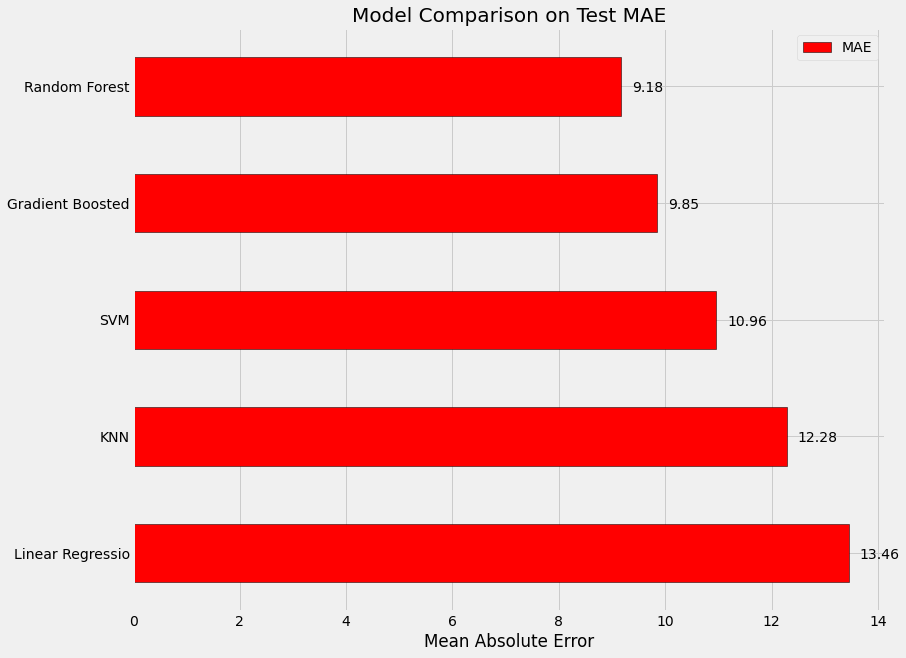

In [86]:
res_df=pd.DataFrame({'Model':list(res.keys()),
                    'MAE': list(res.values())})

res_df.sort_values(by='MAE', ascending = False).plot(x = 'Model', y = 'MAE', kind = 'barh',
                                    color = 'red', edgecolor = 'black')

for i, v in enumerate(sorted(list(res.values()))[::-1]):
    plt.text(v+0.2, i-.05, f'{v:.2f}', color='k')

plt.ylabel('')
plt.yticks(size = 14)
plt.xlabel('Mean Absolute Error')
plt.xticks(size = 14)
plt.title('Model Comparison on Test MAE', size = 20);

Although Random Forest seems to be better than Gradient Bossing here, I'll continue with the latter, as it's an extremely powerful algorithm which variation (XGBoost) dominates Kaggle competitions.

# Model Optimization

Model optimization (finding best hyperparameters) will be done using Bayesian Optimization with Cross Validation. Unlike Grid or Random searches, Bayesian Optimization uses the past model information to select hyperparameter values to build the newer model.

In [87]:
from scipy.stats import uniform, randint

loss = ['ls', 'lad', 'huber']
n_estimators = list(range(100, 1000))
max_depth = list(range(2, 21))
learning_rate=(0.05, 0.5, 'uniform')
min_samples_leaf = list(range(1, 11))
min_samples_split = list(range(2, 11))
max_features = ['auto', 'sqrt', 'log2', None]

hp_grid = {'loss': loss,
            'learning_rate':learning_rate,
            'n_estimators': n_estimators,
            'max_depth': max_depth,
            'min_samples_leaf': min_samples_leaf,
            'min_samples_split': min_samples_split,
            'max_features': max_features}

 NOTE: I've run this code multiple times and have got the best parameters. But just to make things run faster I turned off the `BayesSearchCV` and just used the rehressor it gave me in previous runs. 

In [88]:
model=GradientBoostingRegressor()

rand_cv=BayesSearchCV(estimator=model,
                            search_spaces=hp_grid,
                            cv=5, n_iter=25,
                            scoring='neg_mean_absolute_error',
                            verbose=1,
                            n_jobs=-1,
                            return_train_score=True)
# rand_cv.fit(X_train, y_train)

In [89]:
# best_tree=rand_cv.best_estimator_
# best_tree

best_tree=GradientBoostingRegressor(learning_rate=0.05, loss='huber', max_depth=13,
                          max_features='log2', min_samples_leaf=10,
                          min_samples_split=6, n_estimators=999)

In [90]:
# rand_search_res= pd.DataFrame(rand_cv.cv_results_).sort_values('mean_test_score', ascending = False)
# rand_search_res.head()

# Evaluate Best Model on Test Set

A good idea after optimization is to build two models: a default (delault parameters set by `sklearn`) and an optimized one to see whether there is a difference between them. 

In [91]:
default_model = GradientBoostingRegressor(random_state = 42)

default_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [92]:
best_tree.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, loss='huber', max_depth=13,
                          max_features='log2', min_samples_leaf=10,
                          min_samples_split=6, n_estimators=999)

In [93]:
default_pred = default_model.predict(X_test)
final_pred = best_tree.predict(X_test)

print(f'Default model performance on the test set: MAE = {mean_absolute_error(y_test, default_pred)}')
print(f'Final model performance on the test set:   MAE = {mean_absolute_error(y_test, final_pred)}')

Default model performance on the test set: MAE = 9.854675366200789
Final model performance on the test set:   MAE = 9.246356773395428


The error decreased, hence, the optimization does help. Let's use some plots to compare actual and predicted values. 

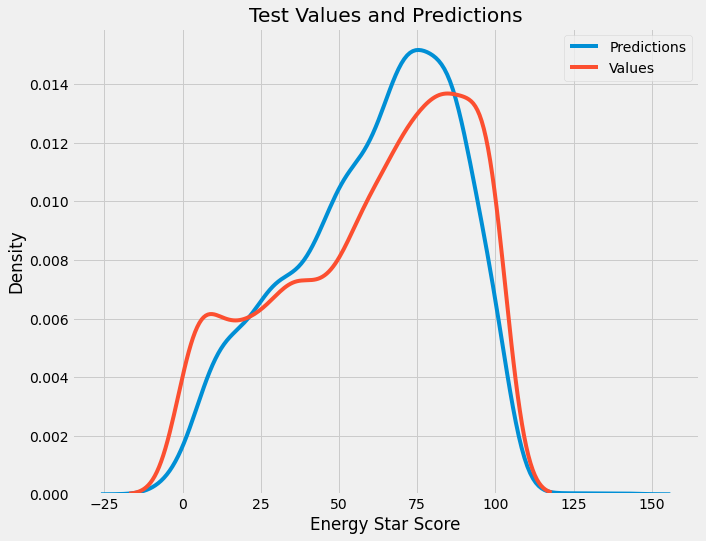

In [94]:
figsize(10, 8)

sns.kdeplot(final_pred, label = 'Predictions')
sns.kdeplot(y_test, label = 'Values')

plt.legend()
plt.xlabel('Energy Star Score')
plt.ylabel('Density')
plt.title('Test Values and Predictions');

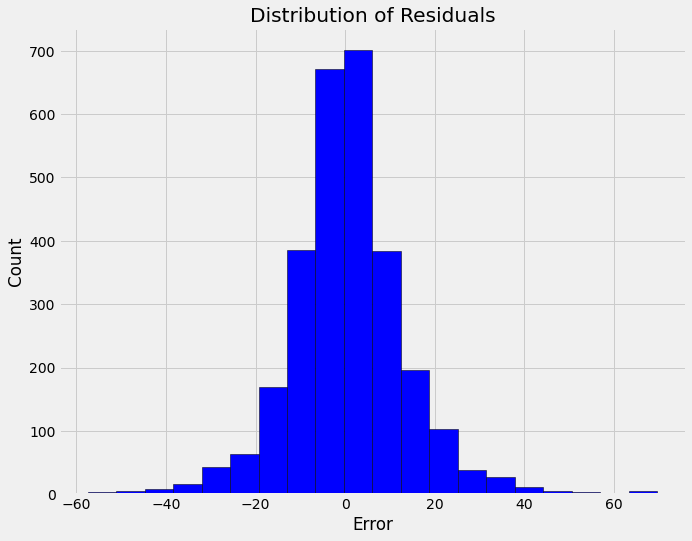

In [95]:
figsize = (10, 8)

residuals = final_pred - y_test

plt.hist(residuals, color = 'blue', bins = 20,
            edgecolor = 'black')
plt.xlabel('Error')
plt.ylabel('Count')
plt.title('Distribution of Residuals');

# Model Interpretation

Now we have a ready-to-use optimized model, but there's a problem: model interpretability. If someone with no knowledge/experience in Data Science look at the model, they would understand nothing. We should at least try to minimize the confusion and explain the mdoel through some visuals. 

In [96]:
# !pip install lime

In [97]:
import lime 
import lime.lime_tabular

## Feature Importance

Feature importance is one of the basic (yet very effective) methods to explain a model. It basically shows how much each predictor (feature) is important for the prediction, contributes to it. Tree-based algorithms (Gradient Boosting is one of them) has built-in feature importance calculation. In `sklearn` you just need to use `.feature_importances_` and you'll get the values. Let's get 10 most important features.

In [98]:
feat_res=pd.DataFrame({'feature': train_features.columns.drop(['log_Longitude', 'sqrt_Longitude']),
                        'importance':best_tree.feature_importances_})\
                            .sort_values(by='importance', ascending=False).reset_index(drop=True)
feat_res.head()

,feature,importance
0,Site EUI (kBtu/ft²),0.435
1,Weather Normalized Site Electricity Intensity ...,0.187
2,Weather Normalized Site Natural Gas Intensity ...,0.124
3,Year Built,0.034
4,Order,0.029


<Figure size 720x576 with 0 Axes>

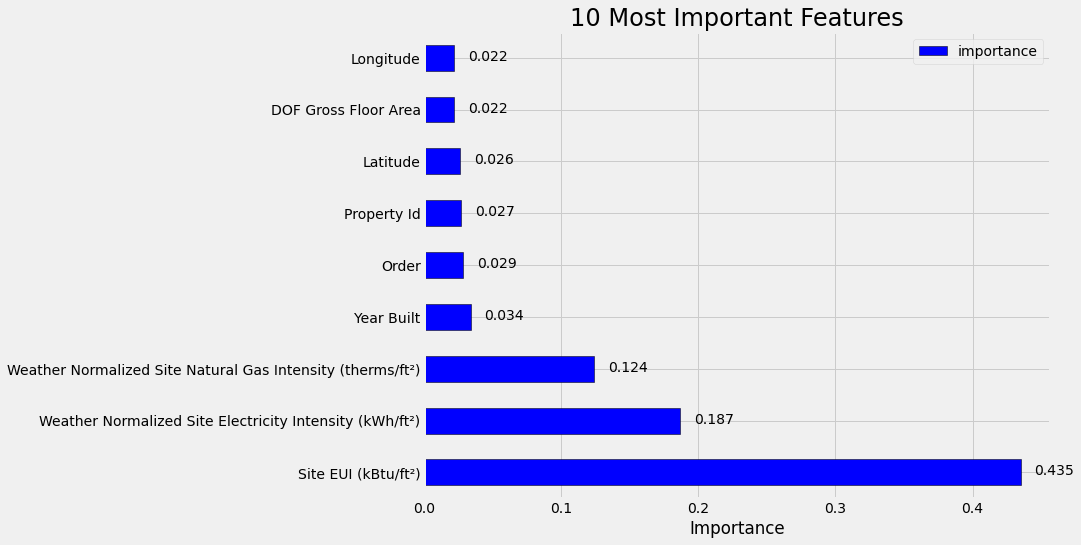

In [99]:
plt.figure(figsize=(10, 8))

feat_res.iloc[:9, :].plot(kind='barh', x='feature', y='importance', color='blue', edgecolor='k');

plt.ylabel('')
plt.xlabel('Importance')
plt.title('10 Most Important Features', size=24)

for i, v in enumerate(feat_res.iloc[:9, 1]):
    plt.text(v+0.01, i-0.05, f'{v:.3f}', color='k')

As we can see, `Site EUI (kBtu/ft²)` has the biggest importance, followed by `Weather Normalized Site Electricity Intensity`. Now let's test something: can we predict target without much loss in accuracy by using only these 10 features?

In [104]:
most_important_feats=feat_res['feature'][:10]

indices=[list(train_features.columns).index(x) for x in most_important_feats]

X_train_reduced = X_train[:, indices]
X_test_reduced = X_test[:, indices]

In [106]:
[list(train_features.columns).index(x) for x in most_important_feats]

[6, 7, 8, 3, 0, 1, 10, 2, 11, 34]

In [108]:
list(most_important_feats)

['Site EUI (kBtu/ft²)',
 'Weather Normalized Site Electricity Intensity (kWh/ft²)',
 'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
 'Year Built',
 'Order',
 'Property Id',
 'Latitude',
 'DOF Gross Floor Area',
 'Longitude',
 'Largest Property Use Type_Multifamily Housing']

In [102]:
X_train_inv=sc.inverse_transform(X_train)
X_train_inv[0]

array([ 2.8820000e+03,  2.7157850e+06,  6.5750000e+04,  1.9240000e+03,
        1.0000000e+00,  1.0000000e+02,  6.9500000e+01,  5.1000000e+00,
        6.0000000e-01,  2.8132000e+03,  4.0765933e+01, -7.3985065e+01,
        4.0000000e+00,  1.3900000e+02,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        1.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
      

In [101]:
X_test_reduced[0]

array([0.38378906, 0.37078652, 0.26315789, 0.75656325, 0.15085516,
       0.80843125, 0.57652193, 0.00161919, 0.50245839, 0.        ])

In [67]:
# reduced_gb=rand_cv.best_estimator_
reduced_gb=GradientBoostingRegressor(learning_rate=0.05, loss='huber', max_depth=13,
                          max_features='log2', min_samples_leaf=10,
                          min_samples_split=6, n_estimators=999)

reduced_gb.fit(X_train_reduced, y_train)
reduced_pred=reduced_gb.predict(X_test_reduced)

print(f'Gradient Boosted Reduced Results: MAE = {mean_absolute_error(y_test, reduced_pred)}')

Gradient Boosted Reduced Results: MAE = 10.546880686599073


We made the model much simpler, but lots some accuracy. Whether it's worth it or not can depend on many things. 

## Locally Interpretable Model-agnostic Explanations (LIME)

LIME is a relatively new method to explain individual predictions made by the model. We can test it by taking the worst and best predictions and see ehat LIME can tell us about them.

In [68]:
residuals=abs(reduced_pred - y_test)

best, worst=X_train_reduced[np.argmin(residuals), :], X_train_reduced[np.argmax(residuals), :]
best, worst

(array([3.37402344e-01, 7.86290323e-02, 3.15789474e-01, 8.74659401e-01,
        0.00000000e+00, 4.84064782e-01, 5.85325144e-01, 8.08000839e-04,
        6.67305154e-01, 5.82466684e-04]),
 array([0.54589844, 0.08064516, 0.57894737, 0.78474114, 0.        ,
        0.58698548, 0.70623581, 0.00117768, 0.55805078, 0.00231189]))

In [69]:
lime_explainer=lime.lime_tabular.LimeTabularExplainer(training_data=X_train_reduced,
                                                        mode='regression',
                                                        training_labels=y_train,
                                                        feature_names=list(most_important_feats))

Prediction: 22.163878860497327
Actual: 100.0


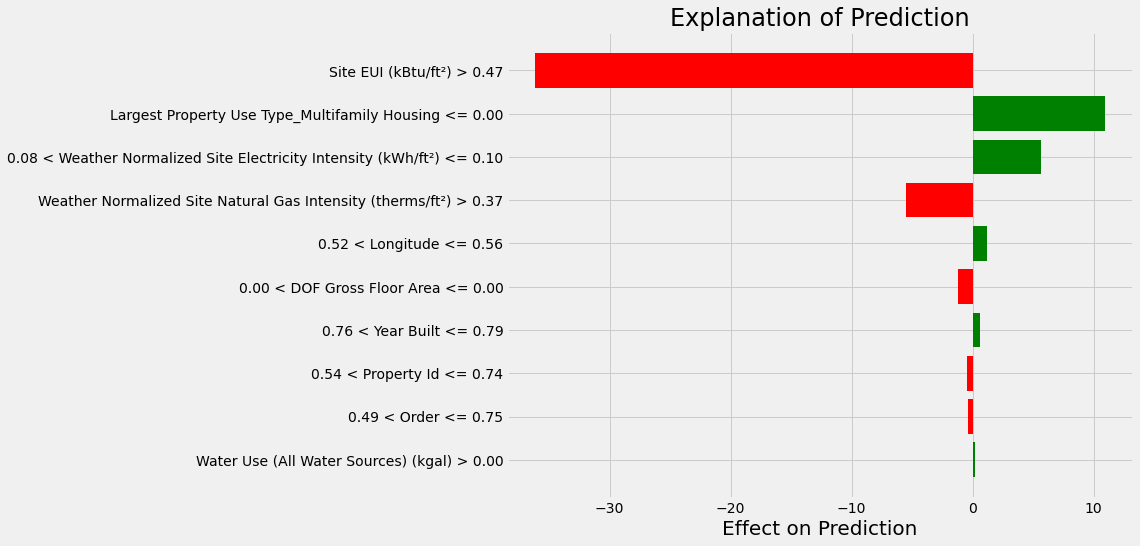

In [70]:
print(f'Prediction: {reduced_gb.predict(worst.reshape(1,-1))[0]}\nActual: {y_test[np.argmax(residuals)]}')

wrong_exp=lime_explainer.explain_instance(data_row = worst, 
                                       predict_fn = reduced_gb.predict)

wrong_exp.as_pyplot_figure()
plt.title('Explanation of Prediction', size = 24)
plt.xlabel('Effect on Prediction', size = 20);

Here the actual target is 100, but the prediction is 22.16, which is pretty inaccurate. LIME plot shows us how each feature affected the prediction and whether it reduced y_pred or increased it. For instance, because `Site EUI (kBtu/ft²)` is less than 0.47 the prediction decreased significantly. Contrary, `Weather Normalized Site Electricity Intensity` being between 0.08 and 0.10 increased the prediction.

Prediction: 79.79164865708397
Actual: 85.0


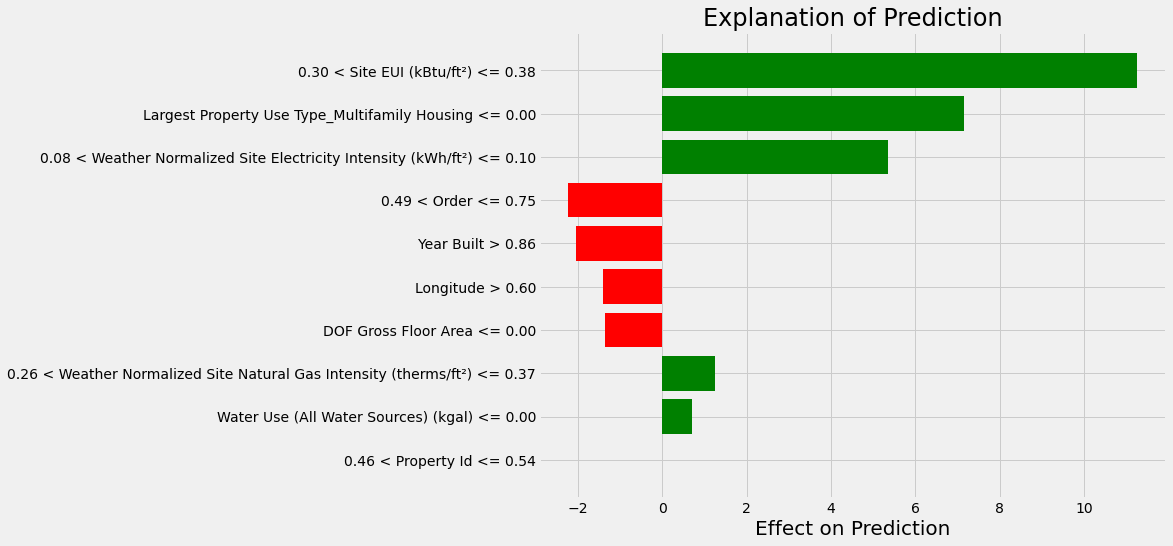

In [71]:
print(f'Prediction: {reduced_gb.predict(best.reshape(1,-1))[0]}\nActual: {y_test[np.argmin(residuals)]}')

best_exp=lime_explainer.explain_instance(data_row = best, 
                                        predict_fn = reduced_gb.predict)

best_exp.as_pyplot_figure()
plt.title('Explanation of Prediction', size = 24)
plt.xlabel('Effect on Prediction', size = 20);

On this plot we see that somewhat similar picture, but take a closer look at predictors, their order and values are different. For example, `Longitude` in previous case increased the prediction, but here it causes a drop. Overall, LIME plots are quite intuitive and easy to interpret, so you should at least try to use this method.

## Visualize a Single Decision Tree

The last method of model explanation here is plotting a simge tree from an ensemble. First we need to get the `.dot` file which contains the tree. Then convert to to  `.png` (i used [this](https://dreampuf.github.io/GraphvizOnline/) tool). And finnally just read the image and plot it.

In [81]:
from sklearn import tree

single_tree=reduced_gb.estimators_[100][0]

tree.export_graphviz(single_tree, out_file = '../data/tree_small.dot',
                    rounded = True, feature_names = list(most_important_feats),
                    filled = True, max_depth = 3)

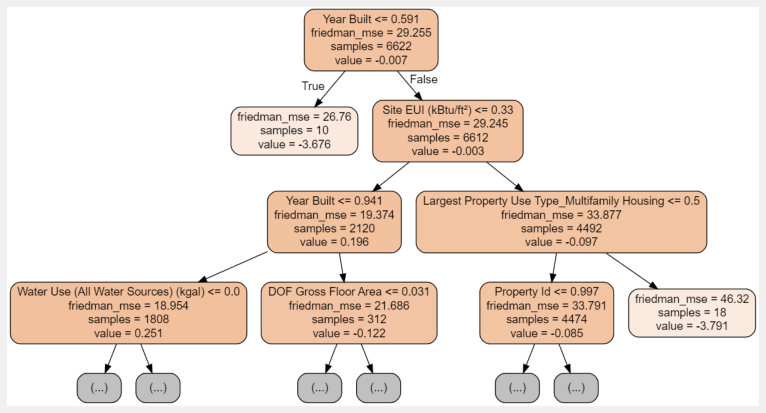

In [89]:
import cv2

plt.figure(figsize=(12,8))

tree_png=cv2.imread('../data/graphviz.png')
tree_png=cv2.cvtColor(tree_png, cv2.COLOR_BGR2RGB)

plt.axis('off')
plt.grid('off')
plt.imshow(tree_png);

The tree itself is very easy to undertand. For instance, the first question is whether `Year Built`<=0.591. If Yes, then we move to the left and we have our final prediction. If no, we move right and ask other questions until we reach some leaf node (terminal, no splits).

# Save Model

The only thing left is to save the model for later use. This can be done using `pickle` package. As thre are two models (full and reduced) I'll just save both.

In [98]:
import pickle

full_gb_file='../models/full_gbtree.sav'
reduced_gb_file='../models/reduced_gbtree.sav'

pickle.dump(best_tree, open(full_gb_file, 'wb'))
pickle.dump(reduced_gb, open(reduced_gb_file, 'wb'))

Now let's load the model and make some predictions.

In [99]:
loaded_reduced_gb=pickle.load(open(reduced_gb_file, 'rb'))
y_pred=loaded_reduced_gb.predict(X_test_reduced)
y_pred[:5]

array([66.92888387, 67.43378631, 24.56961176, 24.72872301, 51.68028392])

It works just fine. Now this model is ready-to-use and can be deployed. 

That's it! It was a long journey, but the project is finally complete. The one thing I skipped is report writing. Instead of that, I'm gonna deploy the model as an Web App using Streamlit. 